In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", 'This pattern has match groups')
warnings.filterwarnings("ignore", 'Dataset has 0 variance; skipping density estimate.')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.options.display.max_columns = 100000

In [16]:
teams = pd.read_csv('data/cbb.csv')
teams['SEED_str'] = teams['SEED'].astype(pd.StringDtype())
teams['Adj_OtoD_Margin'] = teams['ADJOE']-teams['ADJDE']

teams_2021 = pd.read_csv('data/cbb21.csv')
teams_2021['SEED_str'] = teams_2021['SEED'].astype(pd.StringDtype())

tourney_teams_2021 = teams_2021.loc[teams_2021.SEED.notnull()]
tourney_teams_2021['SEED_str'] = tourney_teams_2021['SEED'].astype(pd.StringDtype())
tourney_teams_2021 = teams_2021.loc[teams_2021.SEED.notnull()]

# Data crunching to compare past champions to average of each round

tourney_teams = teams.loc[teams.SEED.notnull()]
champions = tourney_teams[tourney_teams["POSTSEASON"].str.contains('Champions')]
not_champions = tourney_teams[~tourney_teams["POSTSEASON"].str.contains('Champions')]
runner_ups = tourney_teams[tourney_teams["POSTSEASON"].str.contains('2ND')]
final4 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('F4')]
elite8 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('E8')]
sweet16 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('S16')]
round32 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('R32')]
round64 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('R64')]
round68 = tourney_teams[tourney_teams["POSTSEASON"].str.contains('R68')]
tourney_teams['isChampion'] = np.where(tourney_teams["POSTSEASON"].str.contains('Champions'), 1, 0)

# AVGs for non-champions\n",
not_champs_avg_stats = not_champions.mean()
not_champs_avg_stats_df = not_champs_avg_stats.to_frame()
not_champs_avg_stats_df = not_champs_avg_stats_df.transpose()
not_champs_avg_stats_df.insert(0,"TEAM", "AVG OF NON CHAMPS")
not_champs_avg_stats_df.insert(1,"CONF", "N/A CONF")
not_champs_avg_stats_df.insert(21,"POSTSEASON", "Avg Tourney Team")
not_champs_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champions.append(not_champs_avg_stats_df)

# AVGs for runner ups\n",
runner_ups_avg_stats = runner_ups.mean()
runner_ups_avg_stats_df = runner_ups_avg_stats.to_frame()
runner_ups_avg_stats_df = runner_ups_avg_stats_df.transpose()
runner_ups_avg_stats_df.insert(0,"TEAM", "Runner Ups")
runner_ups_avg_stats_df.insert(1,"CONF", "N/A CONF")
runner_ups_avg_stats_df.insert(21,"POSTSEASON", "Avg Runner Up")
runner_ups_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(runner_ups_avg_stats_df)

# AVGs for final four teams
f4_avg_stats = final4.mean()
f4_avg_stats_df = f4_avg_stats.to_frame()
f4_avg_stats_df = f4_avg_stats_df.transpose()
f4_avg_stats_df.insert(0,"TEAM", "Final Four")
f4_avg_stats_df.insert(1,"CONF", "N/A CONF")
f4_avg_stats_df.insert(21,"POSTSEASON", "Avg F4 Team")
f4_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(f4_avg_stats_df)

# AVGs for elite eight teams
e8_avg_stats = elite8.mean()
e8_avg_stats_df = e8_avg_stats.to_frame()
e8_avg_stats_df = e8_avg_stats_df.transpose()
e8_avg_stats_df.insert(0,"TEAM", "Elite Eight")
e8_avg_stats_df.insert(1,"CONF", "N/A CONF")
e8_avg_stats_df.insert(21,"POSTSEASON", "Avg E8 Team")
e8_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(e8_avg_stats_df)

# AVGs for sweet sixteen teams
s16_avg_stats = sweet16.mean()
s16_avg_stats_df = s16_avg_stats.to_frame()
s16_avg_stats_df = s16_avg_stats_df.transpose()
s16_avg_stats_df.insert(0,"TEAM", "Sweet Sixteen")
s16_avg_stats_df.insert(1,"CONF", "N/A CONF")
s16_avg_stats_df.insert(21,"POSTSEASON", "Avg S16 Team")
s16_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(s16_avg_stats_df)

# AVGs for round of 32 teams
r32_avg_stats = round32.mean()
r32_avg_stats_df = r32_avg_stats.to_frame()
r32_avg_stats_df = r32_avg_stats_df.transpose()
r32_avg_stats_df.insert(0,"TEAM", "Round of 32")
r32_avg_stats_df.insert(1,"CONF", "N/A CONF")
r32_avg_stats_df.insert(21,"POSTSEASON", "Avg R32 Team")
r32_avg_stats_df.insert(24,"SEED_str", "N/A SEED"),
champ_vs_avg_df = champ_vs_avg_df.append(r32_avg_stats_df)

# AVGs for round of 64 teams
r64_avg_stats = round64.mean()
r64_avg_stats_df = r64_avg_stats.to_frame()
r64_avg_stats_df = r64_avg_stats_df.transpose()
r64_avg_stats_df.insert(0,"TEAM", "Round of 64")
r64_avg_stats_df.insert(1,"CONF", "N/A CONF")
r64_avg_stats_df.insert(21,"POSTSEASON", "Avg R64 Team")
r64_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(r64_avg_stats_df)

# AVGs for round of 68 teams
r68_avg_stats = round68.mean()
r68_avg_stats_df = r68_avg_stats.to_frame()
r68_avg_stats_df = r68_avg_stats_df.transpose()
r68_avg_stats_df.insert(0,"TEAM", "Round of 68")
r68_avg_stats_df.insert(1,"CONF", "N/A CONF")
r68_avg_stats_df.insert(21,"POSTSEASON", "Avg R68 Team")
r68_avg_stats_df.insert(24,"SEED_str", "N/A SEED")
champ_vs_avg_df = champ_vs_avg_df.append(r68_avg_stats_df)

In [ ]:
sns.scatterplot(data=teams, x="EFG_D", y="EFG_O", hue='POSTSEASON')
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
sns.scatterplot(data=teams, x="DRB", y="ORB", hue='POSTSEASON')
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
sns.scatterplot(data=teams, x="2P_O", y="EFG_D", hue='POSTSEASON')
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
sns.scatterplot(data=teams, x="FTRD", y="FTR", hue='POSTSEASON')
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
sns.scatterplot(data=teams, x="FTRD", y="ADJOE", hue='POSTSEASON')
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
sns.scatterplot(data=teams_2021, x="ADJDE", y="ADJOE", hue='SEED_str')
plt.rcParams['figure.figsize'] = (10,10)
for i in range(teams_2021.shape[0]):
    plt.text(x=tourney_teams_2021.ADJDE[i]+0.3,y=tourney_teams_2021.ADJOE[i]+0.3,s=tourney_teams_2021.TEAM[i],
    fontdict=dict(color='red',size=10),
    bbox=dict(facecolor='yellow',alpha=0.5))

In [ ]:
sns.scatterplot(data=teams_2021, x="FTRD", y="FTR", hue='SEED_str')
plt.rcParams['figure.figsize'] = (10,10)
for i in range(teams_2021.shape[0]):
    plt.text(x=tourney_teams_2021.FTRD[i]+0.3,y=tourney_teams_2021.FTR[i]+0.3,s=tourney_teams_2021.TEAM[i],
    fontdict=dict(color='red',size=10),
    bbox=dict(facecolor='yellow',alpha=0.5))

In [ ]:
teams[['ADJOE','POSTSEASON']].groupby('POSTSEASON').mean().plot(kind='bar', legend=True, alpha=.5)

#Important Stats from this: ADJOE, 3P_D, 2P_O, ADJDE

In [ ]:
teams_shooting = teams[['EFG_O','EFG_D','2P_O','2P_D','3P_O','3P_D','POSTSEASON']]
sns.pairplot(teams_shooting, hue='POSTSEASON')

In [ ]:
teams_style = teams[['ADJOE','ADJDE','ORB','DRB','TOR','TORD','FTR','FTRD','POSTSEASON']]
sns.pairplot(teams_style, hue='POSTSEASON')

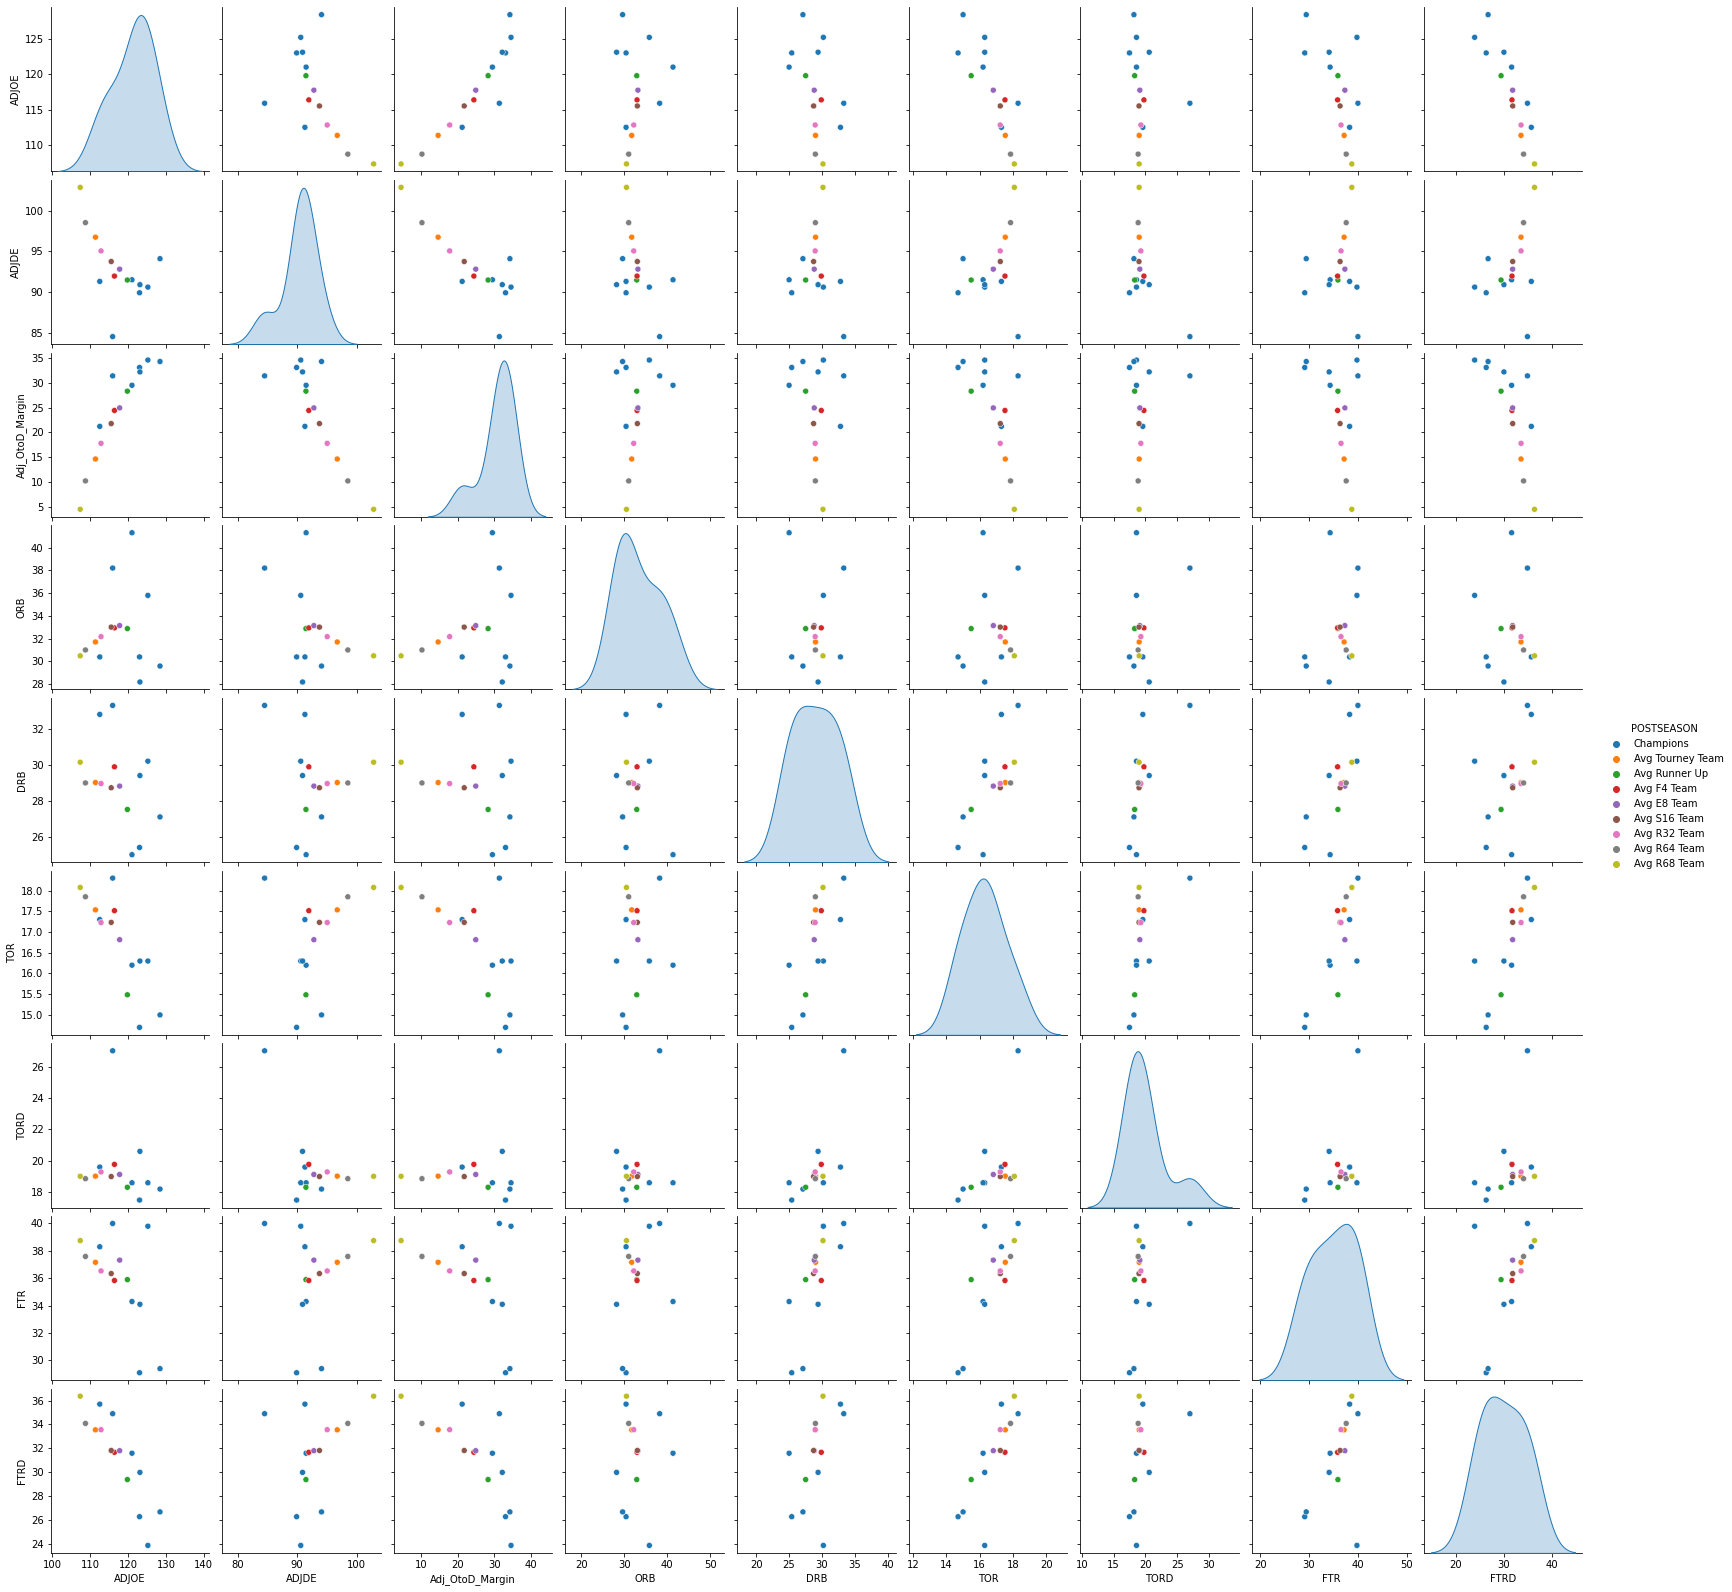

In [24]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
#style = champ_vs_avg_df[['ADJOE','ADJDE','Adj_OtoD_Margin','ORB','DRB','TOR','TORD','FTR','FTRD','POSTSEASON']]
style = champ_vs_avg_df[['ADJOE','ADJDE','Adj_OtoD_Margin','ORB','DRB','TOR','TORD','FTR','FTRD']]
model.fit(style)
style['POSTSEASON'] = champ_vs_avg_df['POSTSEASON']

sns.pairplot(style, hue='POSTSEASON')

In [ ]:
tourney_teams_2022 = pd.read_csv('data/2022_team_results.csv')
tourney_teams_2022['Adj_OtoD_Margin'] = tourney_teams_2022['adjoe']-tourney_teams_2022['adjde']
teams_2022_final = pd.read_csv('data/2022_fffinal.csv')
teams_2022_final = teams_2022_final.rename(columns={"TeamName": "team"})
tourney_teams_2022_join = tourney_teams_2022.merge(teams_2022_final, on="team")
championship_candidates = tourney_teams_2022_join[(tourney_teams_2022_join["Adj_OtoD_Margin"] > 25) & (tourney_teams_2022_join["TO%"] < 18)]
championship_candidates.sort_values("Adj_OtoD_Margin", ascending=False)

In [ ]:
####################################
###### ADDITIONAL EDA TO COME ######
####################################

# For study to be ready by next year:
col_names = tourney_teams_2022_join.columns
historical_df = pd.DataFrame(columns=[col_names])
for year in range(2012,2022):
    team_results = pd.read_csv('data/'+str(year)+'_team_results.csv')
    fffinal = pd.read_csv('data/'+str(year)+'_fffinal.csv')
    fffinal = fffinal.rename(columns={"TeamName": "team"})
    teams_2022_join = team_results.merge(fffinal, on="team")
    historical_df.append(teams_2022_join)
   

c:\Users\mattg\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	training's multi_logloss: 1.3302	valid_0's multi_logloss: 1.64854
[4]	training's multi_logloss: 1.25701	valid_0's multi_logloss: 1.60902
[6]	training's multi_logloss: 1.19331	valid_0's multi_logloss: 1.57955
[8]	training's multi_logloss: 1.13802	valid_0's multi_logloss: 1.55804
[10]	training's multi_logloss: 1.08567	valid_0's multi_logloss: 1.54497
[12]	training's multi_logloss: 1.03878	valid_0's multi_logloss: 1.53997
[14]	training's multi_logloss: 0.995272	valid_0's multi_logloss: 1.53802
[16]	training's multi_logloss: 0.952105	valid_0's multi_logloss: 1.53277
[18]	training's multi_logloss: 0.912412	valid_0's multi_logloss: 1.52921
[20]	training's multi_logloss: 0.876861	valid_0's multi_logloss: 1.5288
[22]	training's multi_logloss: 0.842695	valid_0's multi_logloss: 1.52762
[24]	training's multi_logloss: 0.808965	valid_0's multi_logloss: 1.52993
[26]	training's multi_logloss: 0.778823	valid_0's multi_logloss: 1.53101
[28]	training's multi_logloss: 0.748358	valid_0's multi_logloss

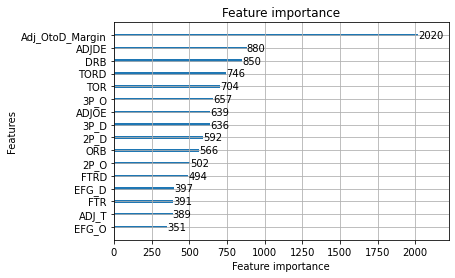

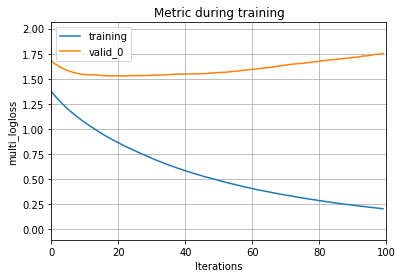

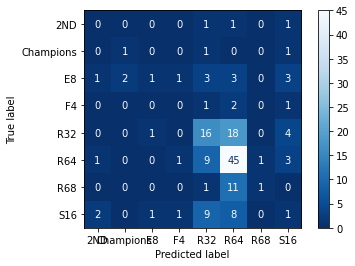

In [61]:
# LGBM (Light Gradient Boosting Model)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

full_teams_df = teams.append(teams_2021)
tourney_teams_df = full_teams_df[full_teams_df['POSTSEASON'].notnull()]
# To define the input and output feature
x = tourney_teams_df.drop(['BARTHAG','WAB','W','G','TEAM','CONF','SEED','POSTSEASON','YEAR','SEED_str'],axis=1)
y = tourney_teams_df.POSTSEASON
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

model = lgb.LGBMClassifier(learning_rate=0.033,max_depth=-3,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=2,eval_metric='logloss')

print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

lgb.plot_importance(model)
lgb.plot_metric(model)
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [69]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=6000)
log_reg_model.fit(x_train, y_train)
y_pred = log_reg_model.predict(x_test)

print('Log Reg Training accuracy {:.4f}'.format(log_reg_model.score(x_train,y_train)))
print('Log Reg Testing accuracy {:.4f}'.format(log_reg_model.score(x_test,y_test)))

Log Reg Training accuracy 0.6226
Log Reg Testing accuracy 0.3861


0.3860759493670886

In [71]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(x_train, y_train)
y_pred = dec_tree_model.predict(x_test)

print('Decision Tree Training accuracy {:.4f}'.format(dec_tree_model.score(x_train,y_train)))
print('Decision Tree Testing accuracy {:.4f}'.format(dec_tree_model.score(x_test,y_test)))

Decision Tree Training accuracy 1.0000
Decision Tree Testing accuracy 0.3608


In [72]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_model = RandomForestClassifier()
rand_forest_model.fit(x_train, y_train)
y_pred = rand_forest_model.predict(x_test)

print('Random Forest Training accuracy {:.4f}'.format(rand_forest_model.score(x_train,y_train)))
print('Random Forest Testing accuracy {:.4f}'.format(rand_forest_model.score(x_test,y_test)))

Random Forest Training accuracy 1.0000
Random Forest Testing accuracy 0.4430


In [74]:
from sklearn.svm import SVC
spt_vec_model = SVC()
spt_vec_model.fit(x_train, y_train)
y_pred = spt_vec_model.predict(x_test)

print('SVM Training accuracy {:.4f}'.format(spt_vec_model.score(x_train,y_train)))
print('SVM Testing accuracy {:.4f}'.format(spt_vec_model.score(x_test,y_test)))

SVM Training accuracy 0.5157
SVM Testing accuracy 0.3797


In [75]:
from sklearn.naive_bayes import GaussianNB
nav_bayes_model = GaussianNB()
nav_bayes_model.fit(x_train, y_train)
y_pred = nav_bayes_model.predict(x_test)

print('Naive Bayes Training accuracy {:.4f}'.format(nav_bayes_model.score(x_train,y_train)))
print('Naive Bayes Testing accuracy {:.4f}'.format(nav_bayes_model.score(x_test,y_test)))

Naive Bayes Training accuracy 0.5409
Naive Bayes Testing accuracy 0.4051


In [ ]:
# Create Function that runs all models from above and ranks them by Test Accuracy